In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_food = pd.read_csv("/content/drive/MyDrive/datathon/pet_food_customer_orders.csv")

In [ ]:
df_vet = pd.read_csv("/content/drive/MyDrive/datathon/veterinary_clinical_data.csv")

In [ ]:
# 결측치 개수 확인
df_food.isnull().sum().sort_values(ascending=False)

,0
customer_support_ticket_category,38801
last_customer_support_ticket_date,38762
pet_allergen_list,38284
wet_food_order_number,36254
wet_tray_size,36254
wet_food_textures_in_order,36254
wet_food_discount_percent,36254
orders_since_first_wet_trays_order,34670
pet_fav_flavour_list,28020
pet_health_issue_list,25326


In [ ]:
# 결측치 개수 확인
df_vet.isnull().sum().sort_values(ascending=False)

,0
AnimalName,0
Breed,0
Age,0
Weight_kg,0
MedicalHistory,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,0
Symptom_5,0


In [ ]:
df_vet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnimalName      10000 non-null  object 
 1   Breed           10000 non-null  object 
 2   Age             10000 non-null  float64
 3   Weight_kg       10000 non-null  float64
 4   MedicalHistory  10000 non-null  object 
 5   Symptom_1       10000 non-null  object 
 6   Symptom_2       10000 non-null  object 
 7   Symptom_3       10000 non-null  object 
 8   Symptom_4       10000 non-null  object 
 9   Symptom_5       10000 non-null  object 
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


In [ ]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49042 entries, 0 to 49041
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   customer_id                                49042 non-null  uint64 
 1   pet_id                                     49042 non-null  uint64 
 2   pet_order_number                           49042 non-null  int64  
 3   wet_food_order_number                      12788 non-null  float64
 4   orders_since_first_wet_trays_order         14372 non-null  float64
 5   pet_has_active_subscription                49042 non-null  bool   
 6   pet_food_tier                              49042 non-null  object 
 7   pet_signup_datetime                        49042 non-null  object 
 8   pet_allergen_list                          10758 non-null  object 
 9   pet_fav_flavour_list                       21022 non-null  object 
 10  pet_health_issue_list 

In [ ]:
# 폰트 설정
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

# 음수
plt.rcParams['axes.unicode_minus'] = False #음수표현하기위해 실행

#가설1 체중(Weight_kg)이 높은 품종일수록 근골격계 관련 증상(예: Pain, Weakness) 이 많이 나타날 것이다.

### 질병에 어떤 종류가 있는지 확인

In [ ]:
print(df_vet.columns.tolist())

['AnimalName', 'Breed', 'Age', 'Weight_kg', 'MedicalHistory', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']


In [ ]:
# 증상 관련 컬럼만 추출
symptom_cols = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']

# 모든 증상값을 한 줄로 펼치기
all_symptoms = pd.Series(df_vet[symptom_cols].values.ravel())

# ① NaN 제거
all_symptoms = all_symptoms.dropna()

# ② 문자열 전처리 (공백 제거 + 소문자로 통일)
all_symptoms = all_symptoms.astype(str).str.strip().str.lower()

# ③ 완전히 같은 문자열(스펠링 구조가 동일한 경우)은 하나만 남기기
unique_symptoms = all_symptoms.drop_duplicates().sort_values().reset_index(drop=True)

In [ ]:
unique_symptoms

,0
0,abdminal pain
1,abdominal destention
2,abdominal discomfort
3,abdominal pain
4,abdonormal discomfort
...,...
864,wound lesion
865,yellow eye
866,yellow in beak
867,yellow or green dropping


In [ ]:
print(unique_symptoms.to_string())

0                                   abdminal pain
1                            abdominal destention
2                            abdominal discomfort
3                                  abdominal pain
4                           abdonormal discomfort
5                                 abdonormal pain
6                              abnormal behaviour
7                           abnormal conformation
8                                 abnormalalities
9                                   abnormalities
10                            abnormally long leg
11                                       abortion
12               abortion at the end of gestation
13                      abortion on late pregancy
14                                     abscessess
15                                    achomotrica
16                              acting aggressive
17                        acting unnaturally tame
18                                      agalactia
19                                 aggressiveness


## 시도(될지는 모르지만)

Symptom_1~5 칼럼에 있는 모든 증상(중복 제거 포함)을
수의학 표준 계통 분류 기준(12계통) 에 따라 분류하고 싶어서 시도함

소화계 / 비뇨기계 / 심혈관계 / 호흡기계/ 피부계 /근골격계/혈액계/림프계와 면역계/내분비계/생식계/신경계/전신계ymptom_1~5 칼럼에 있는 모든 증상(중복 제거 포함)을
수의학 표준 계통 분류 기준에 따라 분류하고 싶어서 시도함

소화계 / 비뇨기계 / 심혈관계 / 호흡기계/ 피부계 /근골격계/혈액계/림프계와 면역계/내분비계/생식계/신경계

| 출처                                   | 설명                                                                                        |
| ------------------------------------ | ----------------------------------------------------------------------------------------- |
| **Merck Veterinary Manual**          | 전 세계적으로 표준으로 쓰이는 수의학 임상 매뉴얼. 질병과 증상을 **해부학적 계통(system)** 단위로 분류함. (예: 소화기계 질환, 근골격계 질환 등) |
| **SNOMED CT – Veterinary Extension** | WHO와 협력하여 수의학 진단/증상 코드를 표준화한 의학용어 체계. 모든 증상은 **System/Anatomical structure** 기준으로 연결됨.    |


| 단계                 | 수행 내용                                                                        | 역할                              |
| ------------------ | ---------------------------------------------------------------------------- | ------------------------------- |
| **1️⃣ 전처리**        | Symptom_1~5 컬럼을 합쳐서 `symptom_text`로 만들고, 모두 소문자 변환                           | 한 마리(혹은 한 케이스)의 증상을 한 줄 텍스트로 만듦 |
| **2️⃣ 룰 기반 분류**    | SNOMED + Merck Vet Manual 키워드를 이용해서 `digestive`, `urinary`, `nervous` 등으로 분류 | 일단 빠르게 확실한 케이스 분류               |
| **3️⃣ BioBERT 보완** | 룰로 잡히지 않은 증상 텍스트를 BioBERT로 분류                                                | 룰에서 빠진 케이스 자동 보완                |
| **4️⃣ 병합**         | `rule_system`과 `biobert_label`을 합쳐 `final_system` 생성                         | 최종 계통 컬럼 완성                     |
| **5️⃣ 저장**         | `veterinary_system_hybrid_classified.csv`로 출력                                | 이후 분석용 입력 데이터 완성                |


In [ ]:
# ============================================================
# 🧬 Veterinary Symptom System Classification (Hybrid Model)
# ============================================================
# 목표: SNOMED + Merck Vet Manual 계통 기준으로 분류
# 방식: Rule-based 1차 + BioBERT 의미 기반 2차 보완
# ============================================================

import pandas as pd
import torch
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# ============================================================
#데이터 전처리
# ============================================================
symptom_cols = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']
df = df_vet.copy()

#결합
df["symptom_text"] = df[symptom_cols].astype(str).apply(lambda x: ", ".join(x.dropna()), axis=1)
df["symptom_text"] = df["symptom_text"].str.lower().str.strip()

# ============================================================
#SNOMED / Merck Vet Manual 기반 룰 분류
# ============================================================

system_keywords = {
    "digestive": [
        "vomit", "diarrhea", "nausea", "colic", "abdominal", "stomach", "bloat",
        "constipation", "anorexia", "jaundice", "liver", "gastritis", "digestion"
    ],
    "urinary": [
        "urine", "urination", "kidney", "bladder", "polyuria", "hematuria", "dysuria"
    ],
    "cardiovascular": [
        "heart", "pulse", "circulation", "cardiac", "tachycardia", "arrhythmia"
    ],
    "respiratory": [
        "cough", "sneeze", "dyspnea", "wheeze", "breath", "respiratory", "nasal", "pneumonia"
    ],
    "integumentary": [
        "skin", "rash", "hair", "itch", "wound", "lesion", "dermatitis", "scab", "fur", "alopecia"
    ],
    "musculoskeletal": [
        "joint", "muscle", "lameness", "stiff", "limp", "back pain", "bone", "arthritis"
    ],
    "hematologic": [
        "anemia", "hemoglobin", "blood", "bleeding", "hemorrhage"
    ],
    "lymphatic_immune": [
        "swelling", "lymph", "infection", "immune", "lymph node", "enlarged lymph"
    ],
    "endocrine": [
        "hormone", "thyroid", "diabetes", "endocrine", "insulin"
    ],
    "reproductive": [
        "uterus", "vaginal", "pregnancy", "abortion", "mammary", "testicular", "reproductive"
    ],
    "nervous": [
        "seizure", "convulsion", "ataxia", "paralysis", "tremor", "nervous", "neurologic", "head tilt"
    ],
    "systemic": [
        "fever", "fatigue", "lethargy", "weakness", "pain", "emaciation", "chills", "death"
    ]
}

def classify_rule_based(text):
    for system, keywords in system_keywords.items():
        if any(k in text for k in keywords):
            return system
    return None

df["rule_system"] = df["symptom_text"].apply(classify_rule_based)

# ============================================================
#BioBERT 보완 (룰로 분류되지 않은 항목만)
# ============================================================

model_name = "dmis-lab/biobert-base-cased-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=12)

pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=-1)

# 룰에서 None인 항목만 추출
unclassified = df[df["rule_system"].isna()].copy()
texts = unclassified["symptom_text"].tolist()

if texts:
    results = pipe(texts, truncation=True, max_length=128, batch_size=8)
    unclassified["biobert_label"] = [r["label"] for r in results]
    unclassified["confidence"] = [r["score"] for r in results]
else:
    unclassified["biobert_label"], unclassified["confidence"] = None, None

# BioBERT 결과 병합
df = df.merge(unclassified[["symptom_text", "biobert_label", "confidence"]],
              on="symptom_text", how="left")

# 최종 라벨 병합
df["final_system"] = df["rule_system"]
df.loc[df["final_system"].isna(), "final_system"] = df["biobert_label"]

# ============================================================
#결과 저장
# ============================================================

df.to_csv("veterinary_system_hybrid_classified.csv", index=False, encoding="utf-8-sig")
print("완료: veterinary_system_hybrid_classified.csv 로 저장됨")


RuntimeError: generic_type: cannot initialize type "RpcBackendOptions": an object with that name is already defined

## 시도 결론
어떻게 해도 이 결과들을 못 믿겠어서 의료데이터는 그만 손대고,,다시 사료데이터로 넘어가기로 함

# 가설1 반려동물의 건강 이슈(pet_health_issue_list,pet_allergen_list)가 많을수록 보호자의 사이트 체류 시간(total_minutes_on_website)이 길다.

In [ ]:
df = df_food.copy()


[OLS 회귀 결과] 건강 문제 + 알러지 개수 → 웹 체류 시간
                            OLS Regression Results                            
Dep. Variable:            log_minutes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     11.35
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.20e-05
Time:                        04:02:15   Log-Likelihood:                -15025.
No. Observations:                7501   AIC:                         3.006e+04
Df Residuals:                    7498   BIC:                         3.008e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------


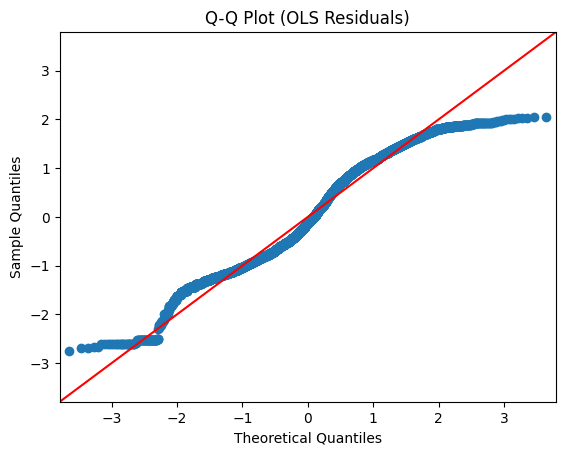

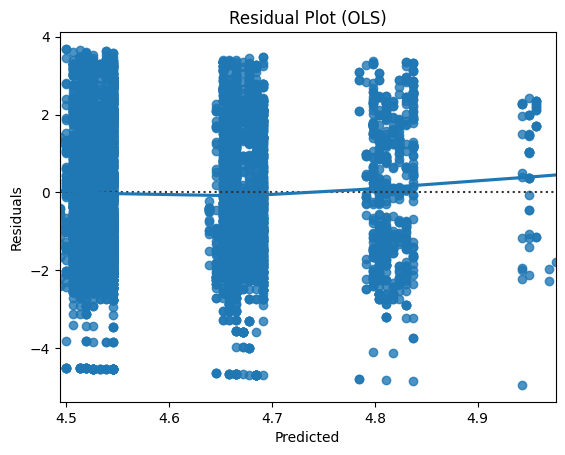


Shapiro-Wilk Test: ShapiroResult(statistic=np.float64(0.9667311999244605), pvalue=np.float64(2.0659448277154695e-38))

30개 이상 등장한 건강 문제: 4개 → ['digestion', 'joints', 'skin and coat', 'pancreatitis']
30개 이상 등장한 알러지: 10개 → ['beef', 'dairy', 'egg', 'grain', 'soya', 'wheat', 'maize', 'fish', 'chicken', 'lamb']
최종 남은 데이터 수: 7501개


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7501.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import chain
from collections import Counter

# ======================================================
# 1. 데이터 정제: 30개 미만 항목 제거
# ======================================================

# ---------------------------------------
# (1) 건강 문제 (pet_health_issue_list)
# ---------------------------------------
health_series = (
    df['pet_health_issue_list']
    .dropna()
    .astype(str)
    .apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])
)

health_flat = list(chain.from_iterable(health_series))
health_counts = Counter(health_flat)
valid_health = [k for k, v in health_counts.items() if v >= 30]

# 30회 이상 등장한 건강 문제만 포함
df = df[df['pet_health_issue_list'].apply(
    lambda x: any(i.strip() in valid_health for i in str(x).split(',')) if pd.notnull(x) else False
)].copy()

# 건강 문제 개수 계산
df['num_health_issues'] = df['pet_health_issue_list'].apply(
    lambda x: len([i for i in str(x).split(',') if i.strip()]) if pd.notnull(x) else 0
)

# ---------------------------------------
# (2) 알러지 (pet_allergen_list)
# ---------------------------------------
allergen_series = (
    df['pet_allergen_list']
    .dropna()
    .astype(str)
    .apply(lambda x: [i.strip() for i in x.split(' ') if i.strip()])
)

allergen_flat = list(chain.from_iterable(allergen_series))
allergen_counts = Counter(allergen_flat)
valid_allergens = [k for k, v in allergen_counts.items() if v >= 30]

# 30회 이상 등장한 알러젠만 포함
df = df[df['pet_allergen_list'].apply(
    lambda x: any(i.strip() in valid_allergens for i in str(x).split(' ')) if pd.notnull(x) else False
)].copy()

# 알러지 개수 및 파생 변수 생성
df['num_allergens'] = df['pet_allergen_list'].apply(
    lambda x: len([i for i in str(x).split(' ') if i.strip()]) if pd.notnull(x) else 0
)
df['num_allergens_3plus'] = (df['num_allergens'] >= 3).astype(int)
df['has_allergen'] = (df['num_allergens'] > 0).astype(int)

# ======================================================
# 2. 이상치 제거 + 로그 변환
# ======================================================
upper = df['total_minutes_on_website'].quantile(0.99)
df_trim = df[df['total_minutes_on_website'] <= upper].copy()
df_trim['log_minutes'] = np.log1p(df_trim['total_minutes_on_website'])

# ======================================================
# 3. 회귀 모델 (OLS)
# ======================================================
X = sm.add_constant(df_trim[['num_health_issues', 'num_allergens']])
Y = df_trim['log_minutes']

ols_model = sm.OLS(Y, X).fit()
print("\n[OLS 회귀 결과] 건강 문제 + 알러지 개수 → 웹 체류 시간")
print(ols_model.summary())

# ======================================================
# 4. 이진화 후 로지스틱 회귀
# ======================================================
threshold = df_trim['total_minutes_on_website'].quantile(0.75)
df_trim['long_stay'] = (df_trim['total_minutes_on_website'] > threshold).astype(int)

X_logit = sm.add_constant(df_trim[['num_health_issues', 'num_allergens_3plus']])
Y_logit = df_trim['long_stay']

logit_model = sm.Logit(Y_logit, X_logit).fit()
print("\n[로지스틱 회귀 결과] 상위 25% 체류자 예측")
print(logit_model.summary())
print("\n[Odds Ratio]\n", np.exp(logit_model.params))

# ======================================================
# 5. 진단 (잔차, 정규성)
# ======================================================
residuals = ols_model.resid
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot (OLS Residuals)")
plt.show()

sns.residplot(x=ols_model.fittedvalues, y=residuals, lowess=True)
plt.title("Residual Plot (OLS)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

print("\nShapiro-Wilk Test:", stats.shapiro(residuals))

# ======================================================
# 6. 필터링된 항목 요약 출력
# ======================================================
print(f"\n30개 이상 등장한 건강 문제: {len(valid_health)}개 → {valid_health}")
print(f"30개 이상 등장한 알러지: {len(valid_allergens)}개 → {valid_allergens}")
print(f"최종 남은 데이터 수: {len(df_trim)}개")


X pet_health_issue_list, pet_allergen_list  
Y total_minutes_on_website

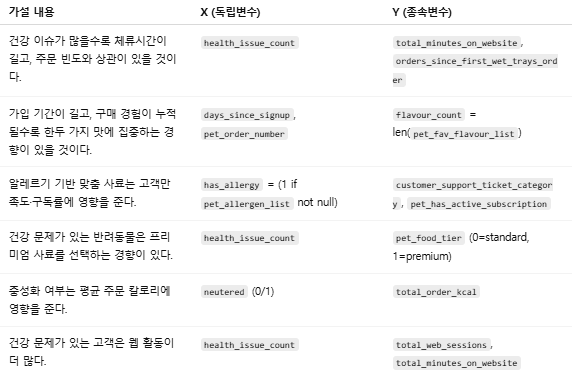

# 가설2(현재는 잠시 보류) 가입 기간이 길고(pet_signup_datetime),구매 경험(pet_order_number)이 누적될수록 한두 가지 맛(pet_fav_flavour_list)에 집중하는 경향이 나타날 것이다.

가입기간이 1970년만 나옴...

In [ ]:
df_food['pet_signup_datetime'].head(10)

,pet_signup_datetime
0,1970-01-01 00:00:01.552397819
1,1970-01-01 00:00:01.552397819
2,1970-01-01 00:00:01.552397819
3,1970-01-01 00:00:01.552397819
4,1970-01-01 00:00:01.552397819
5,1970-01-01 00:00:01.551530404
6,1970-01-01 00:00:01.551530404
7,1970-01-01 00:00:01.551530404
8,1970-01-01 00:00:01.551530404
9,1970-01-01 00:00:01.551530404


In [ ]:
df_food.columns

Index(['customer_id', 'pet_id', 'pet_order_number', 'wet_food_order_number',
       'orders_since_first_wet_trays_order', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_signup_datetime', 'pet_allergen_list',
       'pet_fav_flavour_list', 'pet_health_issue_list', 'neutered', 'gender',
       'pet_breed_size', 'signup_promo', 'ate_wet_food_pre_tails',
       'dry_food_brand_pre_tails', 'pet_life_stage_at_order',
       'order_payment_date', 'kibble_kcal', 'wet_kcal', 'total_order_kcal',
       'wet_trays', 'wet_food_discount_percent', 'wet_tray_size',
       'premium_treat_packs', 'dental_treat_packs',
       'wet_food_textures_in_order', 'total_web_sessions',
       'total_web_sessions_since_last_order', 'total_minutes_on_website',
       'total_minutes_on_website_since_last_order', 'total_wet_food_updates',
       'total_wet_food_updates_since_last_order',
       'last_customer_support_ticket_date',
       'customer_support_ticket_category'],
      dtype='object')

In [ ]:
print(df_food['orders_since_first_wet_trays_order'].head(10))
print(df_food['order_payment_date'].head(10))
print(df_food['total_web_sessions_since_last_order'].head(10))
print(df_food['last_customer_support_ticket_date'].head(10))

0    1.0
1    NaN
2    7.0
3    3.0
4    8.0
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: orders_since_first_wet_trays_order, dtype: float64
0    2019-04-11 00:00:00.000000000
1    2019-03-18 00:00:00.000000000
2    2019-10-27 00:00:00.000000000
3    2019-05-20 00:00:00.000000000
4    2019-11-20 00:00:00.000000000
5    2019-08-15 00:00:00.000000000
6    2019-05-05 00:00:00.000000000
7    2019-12-04 00:00:00.000000000
8    2019-03-07 00:00:00.000000000
9    2019-09-25 00:00:00.000000000
Name: order_payment_date, dtype: object
0    4
1    1
2    0
3    6
4    1
5    2
6    5
7    6
8    0
9    5
Name: total_web_sessions_since_last_order, dtype: int64
0    2019-03-16 09:10:12+00:00
1    2019-03-16 09:10:12+00:00
2    2019-10-26 06:10:13+00:00
3    2019-04-23 06:28:12+00:00
4    2019-10-26 06:10:13+00:00
5                          NaN
6                          NaN
7                          NaN
8                          NaN
9                          NaN
Name: last_customer_support

# 가설3 알레르기 기반(pet_allergen_list) 맞춤 사료는 고객만족도(customer_support_ticket_category가 발생하는가?)(구독률 (pet_has_active_subscription))을 높인다/에 영향을 준다.

In [ ]:
import pandas as pd
import statsmodels.api as sm

df1 = df_food.copy()

## 알러지 맞춤 30개 미만 버리기

In [ ]:
df1['pet_allergen_list'].unique()

array([nan, 'beef dairy egg soya wheat',
       'beef dairy egg grain soya wheat',
       'beef dairy egg grain maize soya wheat', 'grain maize wheat',
       'grain', 'dairy egg fish soya wheat',
       'beef chicken dairy egg lamb soya wheat', 'grain wheat',
       'grain maize soya wheat', 'maize soya wheat', 'dairy', 'chicken',
       'grain maize soya', 'grain soya wheat', 'wheat',
       'beef grain lamb maize soya wheat',
       'beef chicken dairy egg soya wheat',
       'beef chicken dairy egg lamb maize soya wheat', 'beef',
       'dairy egg soya', 'fish grain maize soya wheat',
       'beef dairy soya wheat', 'soya wheat', 'maize wheat',
       'grain maize', 'beef dairy egg lamb soya wheat',
       'beef dairy egg fish soya wheat', 'beef grain',
       'beef dairy egg lamb maize soya wheat', 'fish', 'beef grain maize',
       'beef dairy egg maize soya wheat', 'beef fish',
       'chicken dairy egg fish soya wheat',
       'beef dairy egg fish lamb soya wheat', 'beef wheat'

In [ ]:
#NaN 제외하고 쉼표로 분리
allergen_series = (
    df1['pet_allergen_list']
    .dropna()
    .astype(str)
    .apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])
)

#하나의 리스트로 펼치기
from itertools import chain
allergen_flat = list(chain.from_iterable(allergen_series))

#빈도수 세기
from collections import Counter
allergen_counts = Counter(allergen_flat)

#30개 이상 등장하는 알러젠만 필터링
valid_allergens = [k for k, v in allergen_counts.items() if v >= 30]

print(f"30개 이상 등장하는 알러지: {len(valid_allergens)}")
print(valid_allergens[:20])  # 앞부분만 보기


30개 이상 등장하는 알러지: 44
['beef dairy egg soya wheat', 'beef dairy egg grain soya wheat', 'beef dairy egg grain maize soya wheat', 'grain maize wheat', 'grain', 'beef chicken dairy egg lamb soya wheat', 'grain wheat', 'grain maize soya wheat', 'maize soya wheat', 'dairy', 'chicken', 'grain soya wheat', 'wheat', 'beef chicken dairy egg soya wheat', 'beef', 'beef dairy soya wheat', 'soya wheat', 'maize wheat', 'grain maize', 'beef dairy egg lamb soya wheat']


## 사료 관련 문의 필터링, 30개 미만 버리기

In [ ]:
df_food['customer_support_ticket_category'].unique()

array(['proactive', 'account', nan, 'website', 'delivery', 'portion',
       'payment', 'dry_food', 'health', 'general', 'sign_up',
       'nutrition_team', 'wet_food', 'product_complaint',
       'other_products', 'products', 'wet_food_top-up', 'tech_issue',
       'misc', 'kibble_site_change', 'packaging', 'call_back', 'yodel',
       'blend', 'promotion', 'france', 'proactive_cs', 'product'],
      dtype=object)

In [ ]:
# 사료 관련 문의만 필터링
food_related = [
    'dry_food', 'wet_food', 'wet_food_top-up',
    'blend', 'product_complaint', 'product',
    'products', 'other_products'
]

df_food_only = df_food[df_food['customer_support_ticket_category'].isin(food_related)].copy()

print(df_food_only['customer_support_ticket_category'].value_counts())
print(f"\n남은 행 개수: {len(df_food_only)}")


customer_support_ticket_category
dry_food             1237
wet_food              795
products              221
product_complaint     208
other_products        175
wet_food_top-up       137
blend                  28
product                 7
Name: count, dtype: int64

남은 행 개수: 2808


In [ ]:
# 사료 관련 문의 중 30개 이상만 포함
food_related = [
    'dry_food', 'wet_food', 'wet_food_top-up',
    'products', 'product_complaint', 'other_products'
]

df_food_only = df_food[
    df_food['customer_support_ticket_category'].isin(food_related)
].copy()

print(df_food_only['customer_support_ticket_category'].value_counts())
print(f"\n남은 행 개수: {len(df_food_only)}")


customer_support_ticket_category
dry_food             1237
wet_food              795
products              221
product_complaint     208
other_products        175
wet_food_top-up       137
Name: count, dtype: int64

남은 행 개수: 2773


In [ ]:
# 'delivery' 포함된 고객문의 제거
df1 = df1[~df1['customer_support_ticket_category'].str.contains('delivery', case=False, na=False)].copy()

# 확인
print(f"🚫 배송 관련 남은 행 수: {len(df1[df1['customer_support_ticket_category'].str.contains('delivery', case=False, na=False)])}")

🚫 배송 관련 남은 행 수: 0


## 건강 관련 이슈 30개 미만 버리기

In [ ]:
df_food['pet_health_issue_list'].unique()

array(['digestion, joints', nan, 'digestion', 'joints, skin and coat',
       'skin and coat', 'joints', 'digestion, skin and coat',
       'digestion, joints, skin and coat', 'joints, pancreatitis',
       'pancreatitis', 'digestion, joints, pancreatitis, skin and coat',
       'digestion, pancreatitis', 'joints, pancreatitis, skin and coat',
       'digestion, pancreatitis, skin and coat',
       'digestion, joints, pancreatitis', 'pancreatitis, skin and coat'],
      dtype=object)

1. 쉼표(,) 기준으로 분리
2. 항목별 등장 빈도 계산
3. 30개 미만 항목 제거
4. 각 행에서 남은 항목 개수를 세어 num_health_issues 변수 생성

In [ ]:
from itertools import chain
from collections import Counter

# ---------------------------------------
# NaN 제외하고 쉼표 기준 분리
# ---------------------------------------
health_series = (
    df1['pet_health_issue_list']
    .dropna()
    .astype(str)
    .apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])
)

# ---------------------------------------
# 하나의 리스트로 펼치기
# ---------------------------------------
health_flat = list(chain.from_iterable(health_series))

# ---------------------------------------
# 빈도수 세기
# ---------------------------------------
health_counts = Counter(health_flat)

# ---------------------------------------
# 30개 이상 등장하는 건강 문제만 남기기
# ---------------------------------------
valid_health = [k for k, v in health_counts.items() if v >= 30]
print(f"30개 이상 등장하는 건강 문제: {len(valid_health)}개")
print(valid_health)

# ---------------------------------------
# 유효한 건강 문제만 포함한 행만 남기기
# ---------------------------------------
df1 = df1[
    df1['pet_health_issue_list'].apply(
        lambda x: any(i.strip() in valid_health for i in str(x).split(',')) if pd.notnull(x) else False
    )
].copy()

# ---------------------------------------
# 건강 문제 개수(num_health_issues) 변수 생성
# ---------------------------------------
df1['num_health_issues'] = df1['pet_health_issue_list'].apply(
    lambda x: len([i for i in str(x).split(',') if i.strip()]) if pd.notnull(x) else 0
)

30개 이상 등장하는 건강 문제: 4개
['digestion', 'joints', 'skin and coat', 'pancreatitis']


In [ ]:
import numpy as np
import statsmodels.api as sm

# ==========================================================
# 알러지 + 건강 문제 변수 생성 및 로지 회귀
# ==========================================================

# ---------------------------------------
# 알러지 개수 변수 만들기
# ---------------------------------------
df1['num_allergens'] = df1['pet_allergen_list'].apply(
    lambda x: len([i for i in str(x).split(' ') if i.strip()]) if pd.notnull(x) else 0
)

# 3개 이상 알러젠 여부 / 알러젠 존재 여부
df1['num_allergens_3plus'] = (df1['num_allergens'] >= 3).astype(int)
df1['has_allergen'] = (df1['num_allergens'] > 0).astype(int)

# ---------------------------------------
# 건강 문제 개수 변수 (num_health_issues)
# ---------------------------------------
df1['num_health_issues'] = df1['pet_health_issue_list'].apply(
    lambda x: len([i for i in str(x).split(',') if i.strip()]) if pd.notnull(x) else 0
)

# ---------------------------------------
# 종속변수(Y1): 고객 문의 (사료 관련만)
# ---------------------------------------
# 사료 문의 여부 (1 = 있음, 0 = 없음)
df1['has_ticket'] = df1['customer_support_ticket_category'].isin([
    'dry_food', 'wet_food', 'wet_food_top-up',
    'products', 'product_complaint', 'other_products'
]).astype(int)

# ---------------------------------------
# 종속변수(Y2): 구독 여부
# ---------------------------------------
df1['is_subscribed'] = df1['pet_has_active_subscription'].astype(int)

# ---------------------------------------
# 로지스틱 회귀 ① (알러지 + 건강 문제 → 문의 발생)
# ---------------------------------------
X1 = sm.add_constant(df1[['num_allergens_3plus', 'has_allergen', 'num_health_issues']])
Y1 = df1['has_ticket']

logit_ticket = sm.Logit(Y1, X1).fit()
print("\n[로지스틱 회귀 ①] 알러지 + 건강 문제 → 고객 문의 발생")
print(logit_ticket.summary())
print("\n[Odds Ratio]\n", np.exp(logit_ticket.params))

# ---------------------------------------
# 로지스틱 회귀 ② (알러지 + 건강 문제 → 구독 여부)
# ---------------------------------------
X2 = sm.add_constant(df1[['num_allergens_3plus', 'has_allergen', 'num_health_issues']])
Y2 = df1['is_subscribed']

logit_sub = sm.Logit(Y2, X2).fit()
print("\n[로지스틱 회귀 ②] 알러지 + 건강 문제 → 구독 여부")
print(logit_sub.summary())
print("\n[Odds Ratio]\n", np.exp(logit_sub.params))


Optimization terminated successfully.
         Current function value: 0.228412
         Iterations 7

[로지스틱 회귀 ①] 알러지 + 건강 문제 → 고객 문의 발생
                           Logit Regression Results                           
Dep. Variable:             has_ticket   No. Observations:                23279
Model:                          Logit   Df Residuals:                    23275
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Oct 2025   Pseudo R-squ.:                0.001555
Time:                        04:03:16   Log-Likelihood:                -5317.2
converged:                       True   LL-Null:                       -5325.5
Covariance Type:            nonrobust   LLR p-value:                 0.0008673
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.9419      0.067    -43.697  

# 가설4. 건강 문제가 있는 반려동물(pet_health_issue_list)은 더 좋은(프리미엄) 사료(pet_food_tier)를 선택하는 경향이 있는가?

In [ ]:
import pandas as pd
import numpy as np
from itertools import chain
from collections import Counter
from statsmodels.miscmodels.ordinal_model import OrderedModel

# ======================================================
# 1. 데이터 복사
# ======================================================
df2 = df_food.copy()

# ======================================================
# 2. 30회 이상 등장한 건강 문제 / 알러지 항목 필터링
# ======================================================

# (1) 건강 문제 빈도 계산
health_series = (
    df2['pet_health_issue_list']
    .dropna()
    .astype(str)
    .apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])
)
health_flat = list(chain.from_iterable(health_series))
health_counts = Counter(health_flat)
valid_health = [k for k, v in health_counts.items() if v >= 30]

# (2) 알러지 빈도 계산
allergen_series = (
    df2['pet_allergen_list']
    .dropna()
    .astype(str)
    .apply(lambda x: [i.strip() for i in x.split(' ') if i.strip()])
)
allergen_flat = list(chain.from_iterable(allergen_series))
allergen_counts = Counter(allergen_flat)
valid_allergens = [k for k, v in allergen_counts.items() if v >= 30]

print(f"30개 이상 등장한 건강 문제: {len(valid_health)}개 → {valid_health}")
print(f"30개 이상 등장한 알러지: {len(valid_allergens)}개 → {valid_allergens}")

# ======================================================
# 3. 파생 변수 생성
# ======================================================

# (1) 건강 문제 여부 (30회 이상 등장한 문제 포함 시 1, 아니면 0)
df2['has_health_issue'] = df2['pet_health_issue_list'].apply(
    lambda x: 1 if pd.notnull(x) and any(i.strip() in valid_health for i in str(x).split(',')) else 0
)

# (2) 알러지 개수 및 여부
df2['allergen_count'] = df2['pet_allergen_list'].apply(
    lambda x: len([i for i in str(x).split(' ') if i.strip() and i in valid_allergens]) if pd.notnull(x) else 0
)
df2['has_allergen'] = (df2['allergen_count'] > 0).astype(int)
df2['has_many_allergens'] = (df2['allergen_count'] >= 3).astype(int)

# (3) 사료 등급 숫자화
tier_map = {'mid': 1, 'premium': 2, 'superpremium': 3}
df2['food_tier_num'] = df2['pet_food_tier'].map(tier_map)

# (4) 결측치 제거
df2_model = df2.dropna(subset=['food_tier_num']).copy()

# ======================================================
# 4. 순서형 로지스틱 회귀 (Ordered Logistic Regression)
# ======================================================
X = df2_model[['has_health_issue', 'has_allergen', 'has_many_allergens']]
y = df2_model['food_tier_num'].astype(int)

# 상수항은 자동 포함되므로 불필요한 상수열 제거
X = X.loc[:, (X != X.iloc[0]).any()]  # 모두 동일한 값인 열 제거

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs', disp=False)

# ======================================================
# 5. 결과 출력
# ======================================================
print("\n[Ordered Logistic Regression 결과] 건강 문제 + 알러지 요인 → 사료 등급")
print(res.summary())

# 오즈비(OR) 계산
odds_ratios = np.exp(res.params)
print("\n[Odds Ratios]\n", odds_ratios)

print(f"\n최종 데이터 수: {len(df2_model)}개")

30개 이상 등장한 건강 문제: 4개 → ['digestion', 'joints', 'skin and coat', 'pancreatitis']
30개 이상 등장한 알러지: 10개 → ['beef', 'dairy', 'egg', 'soya', 'wheat', 'grain', 'maize', 'fish', 'chicken', 'lamb']

[Ordered Logistic Regression 결과] 건강 문제 + 알러지 요인 → 사료 등급
                             OrderedModel Results                             
Dep. Variable:          food_tier_num   Log-Likelihood:                -47199.
Model:                   OrderedModel   AIC:                         9.441e+04
Method:            Maximum Likelihood   BIC:                         9.445e+04
Date:                Thu, 30 Oct 2025                                         
Time:                        04:03:23                                         
No. Observations:               49042                                         
Df Residuals:                   49037                                         
Df Model:                           3                                         
                         coef    std err   

# 가설5 반려동물의 중성화 여부(neutered)는 평균 주문 칼로리(total_order_kcal)에 영향을 주는가?


In [ ]:
import pandas as pd
import statsmodels.api as sm

# -----------------------------
#데이터 복사 및 전처리
# -----------------------------
df3 = df_food.copy()

# neutered: bool → int
df3['neutered'] = df3['neutered'].astype(int)

# gender: object로 통일
df3['gender'] = df3['gender'].astype(str)

# 결측치 제거
df3_clean = df3.dropna(subset=['total_order_kcal', 'pet_life_stage_at_order', 'gender'])

# -----------------------------
#더미화 (float형으로 바로 변환)
# -----------------------------
df3_dum = pd.get_dummies(
    df3_clean,
    columns=['pet_life_stage_at_order', 'gender'],
    drop_first=True,
    dtype=float
)

# -----------------------------
#독립변수(X), 종속변수(y) 지정
# -----------------------------
X = sm.add_constant(
    df3_dum[['neutered'] +
            [col for col in df3_dum.columns
             if col.startswith('pet_life_stage_at_order_') or
                col.startswith('gender_')]]
)

y = df3_dum['total_order_kcal']

# 모든 컬럼 float으로 강제 변환 (dtype 에러 방지)
X = X.astype(float)
y = y.astype(float)

# -----------------------------
#선형회귀 실행
# -----------------------------
model = sm.OLS(y, X, missing='drop').fit()

# -----------------------------
#결과 출력
# -----------------------------
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       total_order_kcal   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     545.9
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        04:03:26   Log-Likelihood:            -5.3424e+05
No. Observations:               49042   AIC:                         1.068e+06
Df Residuals:                   49036   BIC:                         1.069e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
df3_clean['pet_life_stage_at_order'].value_counts(normalize=True)

,proportion
pet_life_stage_at_order,
mature,0.594042
half_maturity,0.177644
senior,0.159251
weaning,0.069063


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# weaning 제외
df3_exclude = df3_clean[df3_clean['pet_life_stage_at_order'] != 'weaning']

# 더미화
df3_dum_ex = pd.get_dummies(
    df3_exclude,
    columns=['pet_life_stage_at_order', 'gender'],
    drop_first=True
)

# --- 숫자형 변환 (완전 강제) ---
df3_dum_ex = df3_dum_ex.apply(lambda col: pd.to_numeric(col, errors='coerce'))

# --- X, y 구성 ---
X_cols = ['neutered'] + [
    col for col in df3_dum_ex.columns
    if col.startswith('pet_life_stage_at_order_') or col.startswith('gender_')
]
X_ex = sm.add_constant(df3_dum_ex[X_cols])
y_ex = df3_dum_ex['total_order_kcal']

# --- NaN 제거 ---
valid_idx = (~X_ex.isna().any(axis=1)) & (~y_ex.isna())
X_ex = X_ex.loc[valid_idx]
y_ex = y_ex.loc[valid_idx]

# --- numpy 변환 (dtype 보호막) ---
X_ex = np.asarray(X_ex, dtype=float)
y_ex = np.asarray(y_ex, dtype=float)

# --- 회귀모델 ---
model2 = sm.OLS(y_ex, X_ex).fit()
print("\n[weaning 제외 버전]")
print(model2.summary())


[weaning 제외 버전]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     149.6
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          2.51e-127
Time:                        04:03:33   Log-Likelihood:            -4.9819e+05
No. Observations:               45655   AIC:                         9.964e+05
Df Residuals:                   45650   BIC:                         9.964e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.196e+04    160.394   

# 가설6 반려동물의 건강 문제(pet_health_issue_list)가 있는 고객들은 웹 활동(total_web_sessions, total_minutes_on_website)이 더 길 것인가?

In [ ]:
import numpy as np
import pandas as pd
from itertools import chain
from collections import Counter
import statsmodels.api as sm

# ======================================================
# 1. 데이터 복사
# ======================================================
df4 = df_food.copy()

# ======================================================
# 2. 30회 이상 등장한 건강문제 / 알러지 항목 필터링
# ======================================================

# (1) 건강 문제
health_series = (
    df4['pet_health_issue_list']
    .dropna()
    .astype(str)
    .apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])
)
health_flat = list(chain.from_iterable(health_series))
health_counts = Counter(health_flat)
valid_health = [k for k, v in health_counts.items() if v >= 30]

# (2) 알러지 항목
allergen_series = (
    df4['pet_allergen_list']
    .dropna()
    .astype(str)
    .apply(lambda x: [i.strip() for i in x.split(' ') if i.strip()])
)
allergen_flat = list(chain.from_iterable(allergen_series))
allergen_counts = Counter(allergen_flat)
valid_allergens = [k for k, v in allergen_counts.items() if v >= 30]

print(f"30회 이상 등장한 건강 문제 수: {len(valid_health)}개")
print(f"30회 이상 등장한 알러지 항목 수: {len(valid_allergens)}개")

# ======================================================
# 3. 파생 변수 생성
# ======================================================

# (1) 건강 문제 여부 (30회 이상 항목 포함 시 1)
df4['has_health_issue'] = df4['pet_health_issue_list'].apply(
    lambda x: 1 if pd.notnull(x) and any(i.strip() in valid_health for i in str(x).split(',')) else 0
)

# (2) 알러지 여부 (30회 이상 항목 포함 시 1)
df4['has_allergy'] = df4['pet_allergen_list'].apply(
    lambda x: 1 if pd.notnull(x) and any(i.strip() in valid_allergens for i in str(x).split(' ')) else 0
)

# ======================================================
# 4. 결측치 제거 및 로그 변환
# ======================================================
df4_clean = df4.dropna(subset=['total_minutes_on_website']).copy()
df4_clean['log_minutes'] = np.log1p(df4_clean['total_minutes_on_website'])

# ======================================================
# 5. 회귀 분석
# ======================================================
X = sm.add_constant(df4_clean[['has_health_issue', 'has_allergy']])
y = df4_clean['log_minutes']

model = sm.OLS(y, X).fit()
print(model.summary())

30회 이상 등장한 건강 문제 수: 4개
30회 이상 등장한 알러지 항목 수: 10개
                            OLS Regression Results                            
Dep. Variable:            log_minutes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.35
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           8.36e-31
Time:                        04:03:38   Log-Likelihood:                -99371.
No. Observations:               49042   AIC:                         1.987e+05
Df Residuals:                   49039   BIC:                         1.988e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

# 의료데이터 재도전

In [ ]:
#증상 컬럼 펼치기
symptom_cols = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']
all_symptoms = pd.Series(df_vet[symptom_cols].values.ravel())
all_symptoms = all_symptoms.dropna().astype(str).str.lower().str.strip()

#증상별 등장 빈도 계산
symptom_counts = all_symptoms.value_counts()

#0개 이상 데이터가 있는 증상만 필터링
valid_symptoms = symptom_counts[symptom_counts >= 30].index

#원본 데이터에서 해당 증상만 남기기
df_vet_filtered = df_vet.copy()
for col in symptom_cols:
    df_vet_filtered[col] = df_vet_filtered[col].apply(
        lambda x: x.lower().strip() if isinstance(x, str) and x.lower().strip() in valid_symptoms else np.nan
    )

print(f"필터링 후 남은 증상 수: {len(valid_symptoms)}개")


필터링 후 남은 증상 수: 138개


In [ ]:
# CSV로 저장
df_vet_filtered.to_csv("vet_symptom_filtered.csv", index=False, encoding="utf-8-sig")

print("✅ vet_symptom_filtered.csv 파일 저장 완료!")

✅ vet_symptom_filtered.csv 파일 저장 완료!


In [ ]:
pd.set_option('display.max_rows', None)
symptom_counts.loc[valid_symptoms].sort_values(ascending=False).head(138)

,count
fever,3612
weight loss,3146
diarrhea,3032
coughing,2718
pain,2699
vomiting,2628
lethargy,2602
weakness,2583
anorexia,2445
sneezing,2432


## 138개의 증상이 있음을 확인할 수 있었으나 라벨링이 금방 해결될 것 같지는 않음, 다른 가설 먼저 진행

# 가설1 개(Dog)와 고양이(Cat)는 주요 증상 유형과 수가 다를 것이다.

In [ ]:
df_vet.head()
df_vet.columns

Index(['AnimalName', 'Breed', 'Age', 'Weight_kg', 'MedicalHistory',
       'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df6 = df_vet.copy()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------
# 증상 컬럼 펼치기
# ----------------------------------------
symptom_cols = ["Symptom_1", "Symptom_2", "Symptom_3", "Symptom_4", "Symptom_5"]

df_long = df6.melt(
    id_vars=["AnimalName", "Breed"],
    value_vars=symptom_cols,
    var_name="Symptom_Type",
    value_name="Symptom"
).dropna(subset=["Symptom"])

# 문자열 정리
df_long["Symptom"] = df_long["Symptom"].str.lower().str.strip()

# ----------------------------------------
# 증상별 등장 빈도 계산 (30회 이상)
# ----------------------------------------
symptom_counts = df_long["Symptom"].value_counts()
valid_symptoms = symptom_counts[symptom_counts >= 30].index
df_filtered = df_long[df_long["Symptom"].isin(valid_symptoms)]

# ----------------------------------------
# Dog / Cat 종별 증상 등장 횟수 집계
# ----------------------------------------
animal_symptom_count = (
    df_filtered.groupby(["AnimalName", "Symptom"])
    .size()
    .reset_index(name="count")
)

# ----------------------------------------
# 각 종별 상위 10개 증상만 추출
# ----------------------------------------
top10 = (
    animal_symptom_count
    .sort_values(["AnimalName", "count"], ascending=[True, False])
    .groupby("AnimalName")
    .head(10)
)

In [ ]:
dog_top10 = (
    df_long[df_long["AnimalName"] == "Dog"]
    .groupby("Symptom")["Symptom"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)
print("🐶 Dog 상위 10 증상")
print(dog_top10)

🐶 Dog 상위 10 증상
Symptom
fever          1848
weight loss    1531
diarrhea       1518
pain           1367
coughing       1340
lethargy       1335
vomiting       1285
weakness       1277
anorexia       1196
sneezing       1151
Name: Symptom, dtype: int64


In [ ]:
cat_top10 = (
    df_long[df_long["AnimalName"] == "cat"]
    .groupby("Symptom")["Symptom"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)
print("🐱 Cat 상위 10 증상")
print(cat_top10)

🐱 Cat 상위 10 증상
Symptom
fever          1764
weight loss    1615
diarrhea       1514
coughing       1378
vomiting       1343
pain           1332
weakness       1306
sneezing       1281
lethargy       1267
anorexia       1249
Name: Symptom, dtype: int64


In [ ]:
print(df6.columns.tolist())

['AnimalName', 'Breed', 'Age', 'Weight_kg', 'MedicalHistory', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']


In [ ]:
import pandas as pd

# 분석 대상 품종
target_breeds = ["Bengal", "Ragdoll", "German Shepherd", "Rottweiler"]

# 증상 컬럼
symptom_cols = ["Symptom_1", "Symptom_2", "Symptom_3", "Symptom_4", "Symptom_5"]

# melt (혹시 df_long이 없다면)
df_long = df6.melt(
    id_vars=["AnimalName", "Breed"],
    value_vars=symptom_cols,
    var_name="Symptom_no",
    value_name="Symptom"
).dropna(subset=["Symptom"])

# 분석 대상만 필터링
df_breed = df_long[df_long["Breed"].isin(target_breeds)]

# 증상별 빈도 계산
breed_symptom_count = (
    df_breed.groupby(["Breed", "Symptom"])
    .size()
    .reset_index(name="Count")
)

# 각 품종별 Top10만 추출
top10_each = (
    breed_symptom_count
    .sort_values(["Breed", "Count"], ascending=[True, False])
    .groupby("Breed")
    .head(10)
)

# 보기 쉽게 정렬
top10_each = top10_each.sort_values(["Breed", "Count"], ascending=[True, False])

# ✅ 각 품종별 결과 프린트
for breed in target_breeds:
    print(f"\n{breed} 상위 10 증상")
    display(top10_each[top10_each["Breed"] == breed][["Symptom", "Count"]])



Bengal 상위 10 증상


,Symptom,Count
105,Fever,188
322,Weight loss,182
188,Pain,171
66,Diarrhea,165
318,Weakness,164
309,Vomiting,163
151,Lethargy,154
256,Sneezing,147
12,Anorexia,145
56,Coughing,134



Ragdoll 상위 10 증상


,Symptom,Count
831,Fever,239
792,Diarrhea,186
1024,Weight loss,178
778,Coughing,165
978,Sneezing,163
1015,Vomiting,161
882,Lethargy,151
743,Anorexia,136
914,Pain,136
1022,Weakness,111



German Shepherd 상위 10 증상


,Symptom,Count
493,Fever,208
687,Weight loss,184
441,Diarrhea,180
431,Coughing,149
570,Pain,144
536,Lethargy,137
676,Vomiting,134
638,Sneezing,119
683,Weakness,117
402,Anorexia,114



Rottweiler 상위 10 증상


,Symptom,Count
1175,Fever,186
1383,Weight loss,180
1144,Diarrhea,163
1369,Vomiting,150
1378,Weakness,148
1100,Anorexia,143
1261,Pain,139
1130,Coughing,129
1223,Lethargy,126
1328,Sneezing,126


# 가설1-1. 연령과 무게에 따라 의료기록의 유형과 수가 다를 것이다.

In [ ]:
df_vet['MedicalHistory'].value_counts().head(20)

,count
MedicalHistory,
Skin conditions history,1017
No previous conditions,995
Recent surgery,953
Chronic illness,940
Not vaccinated,922
Allergies,897
Dental issues,889
Parasite history,888
Previous kidney disease,870


In [ ]:
# -*- coding: utf-8 -*-

# ======================================================
# 0. 패키지 임포트 및 데이터 복사
# ======================================================
import pandas as pd
import numpy as np
import statsmodels.api as sm

df7 = df_vet.copy()

# ======================================================
# 1. MedicalHistory 전처리 (포함 단어 기준 필터)
# ======================================================
df7 = df7[df7['MedicalHistory'].notna()]

drop_keywords = ['No previous', 'Not vaccinated', 'Vaccinated']
pattern = '|'.join(drop_keywords)
df7 = df7[~df7['MedicalHistory'].str.contains(pattern, case=False, na=False)]

print("필터링 후 남은 행 수:", len(df7))

# ======================================================
# 2. 품종별 표준 체중(kg) 딕셔너리
# ======================================================
std_weight = {
    'Bengal': (2.7, 6.8),
    'British Shorthair': (3.6, 7.3),
    'Maine Coon': (5.4, 10.0),
    'Persian': (3.4, 4.3),
    'Ragdoll': (4.5, 9.1),
    'Scottish Fold': (3.2, 4.5),
    'Siamese': (2.3, 5.4),
    'Sphynx': (3.2, 5.4),
    'Beagle': (9.1, 13.6),
    'Boxer': (22.7, 36.3),
    'Bulldog': (18.1, 22.7),
    'German Shepherd': (22.7, 40.8),
    'Golden Retriever': (25.0, 34.0),
    'Poodle': (4.5, 6.8),
    'Rottweiler': (36.3, 61.2),
    'Yorkshire Terrier': (3.2, 3.2)
}

# ======================================================
# 3. 표준체중 대비 실제 체중 비율 계산
# ======================================================
df7['Weight_Ratio'] = df7.apply(
    lambda x: np.nan if pd.isna(x['Weight_kg']) else (
        x['Weight_kg'] / np.mean(std_weight[x['Breed']])
        if x['Breed'] in std_weight else x['Weight_kg'] / df7['Weight_kg'].mean()
    ),
    axis=1
)

# ======================================================
# 4. MedicalHistory → 질환 개수 변환
# ======================================================
df7['Medical_Count'] = df7['MedicalHistory'].apply(
    lambda x: len(x.split(',')) if isinstance(x, str) else 0
)
df7['Has_Medical'] = (df7['Medical_Count'] > 0).astype(int)

# ======================================================
# 5. 이상치 및 로그 변환
# ======================================================
df7 = df7[(df7['Weight_Ratio'] > 0.1) & (df7['Weight_Ratio'] < 5)]
df7 = df7[df7['Age'] > 0]

df7['Age_log'] = np.log1p(df7['Age'])
df7['Weight_log'] = np.log1p(df7['Weight_Ratio'])

print("유효 데이터 수:", len(df7))

# ======================================================
# 6. 선형회귀 (OLS)
# ======================================================
ols_df = df7.dropna(subset=['Age_log', 'Weight_log', 'Medical_Count'])

if len(ols_df) > 0:
    X = sm.add_constant(ols_df[['Age_log', 'Weight_log']])
    y = ols_df['Medical_Count']
    ols_model = sm.OLS(y, X).fit()
    print("\n=== 선형회귀 결과 ===")
    print(ols_model.summary())
else:
    print("\n⚠️ 선형회귀: 유효 데이터 없음")

# ======================================================
# 7. 로지스틱 회귀 (Logit)
# ======================================================
logit_df = df7.dropna(subset=['Age_log', 'Weight_log', 'Has_Medical'])
count_0 = logit_df['Has_Medical'].value_counts().get(0, 0)
count_1 = logit_df['Has_Medical'].value_counts().get(1, 0)
min_count = min(count_0, count_1)

if min_count > 0:
    balanced_df = pd.concat([
        logit_df[logit_df['Has_Medical'] == 0].sample(min_count, random_state=42),
        logit_df[logit_df['Has_Medical'] == 1].sample(min_count, random_state=42)
    ])
else:
    balanced_df = logit_df

if len(balanced_df) > 0:
    X_log = sm.add_constant(balanced_df[['Age_log', 'Weight_log']])
    y_log = balanced_df['Has_Medical']
    logit_model = sm.Logit(y_log, X_log).fit()
    print("\n=== 로지스틱 회귀 결과 ===")
    print(logit_model.summary())
else:
    print("\n⚠️ 로지스틱 회귀: 유효 데이터 없음")

# ======================================================
# 8. 해석 가이드
# ======================================================
print("""
[OLS]
- 종속변수: Medical_Count (질환 개수)
- Age_log, Weight_log 양수이면 나이↑·체중↑일수록 질환↑
- p < 0.05 → 통계적으로 유의

[Logit]
- 종속변수: Has_Medical (0/1)
- exp(β)>1 → 확률 증가, <1 → 감소
- p < 0.05 → 유의
""")


필터링 후 남은 행 수: 7251
유효 데이터 수: 7251

=== 선형회귀 결과 ===
                            OLS Regression Results                            
Dep. Variable:          Medical_Count   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -3624.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               1.00
Time:                        05:06:40   Log-Likelihood:             2.4906e+05
No. Observations:                7251   AIC:                        -4.981e+05
Df Residuals:                    7248   BIC:                        -4.981e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectS

In [ ]:
# -*- coding: utf-8 -*-

# ======================================================
# 0. 패키지 임포트 및 데이터 복사
# ======================================================
import pandas as pd
import numpy as np
import statsmodels.api as sm

df7 = df_vet.copy()

# ======================================================
# 1. MedicalHistory 기반 질환 유무 정의
# ======================================================
# NaN 제거
df7 = df7[df7['MedicalHistory'].notna()]

# 질환이 없거나 예방접종만 한 경우 → 0, 그 외 질환 이력 존재 → 1
df7['Has_Medical'] = (
    ~df7['MedicalHistory'].str.contains('No previous|Vaccinated|Not vaccinated', case=False, na=False)
).astype(int)

# Medical_Count = 질환 개수 (콤마 기준)
df7['Medical_Count'] = df7['MedicalHistory'].apply(
    lambda x: len(x.split(',')) if isinstance(x, str) else 0
)

print("질환 있음/없음 분포:")
print(df7['Has_Medical'].value_counts())

# ======================================================
# 2. 품종별 표준 체중(kg)
# ======================================================
std_weight = {
    'Bengal': (2.7, 6.8),
    'British Shorthair': (3.6, 7.3),
    'Maine Coon': (5.4, 10.0),
    'Persian': (3.4, 4.3),
    'Ragdoll': (4.5, 9.1),
    'Scottish Fold': (3.2, 4.5),
    'Siamese': (2.3, 5.4),
    'Sphynx': (3.2, 5.4),
    'Beagle': (9.1, 13.6),
    'Boxer': (22.7, 36.3),
    'Bulldog': (18.1, 22.7),
    'German Shepherd': (22.7, 40.8),
    'Golden Retriever': (25.0, 34.0),
    'Poodle': (4.5, 6.8),
    'Rottweiler': (36.3, 61.2),
    'Yorkshire Terrier': (3.2, 3.2)
}

# ======================================================
# 3. 체중비율 계산 (Mixed Breed 평균 대체)
# ======================================================
df7['Weight_Ratio'] = df7.apply(
    lambda x: np.nan if pd.isna(x['Weight_kg']) else (
        x['Weight_kg'] / np.mean(std_weight[x['Breed']])
        if x['Breed'] in std_weight else x['Weight_kg'] / df7['Weight_kg'].mean()
    ),
    axis=1
)

# 이상치 필터
df7 = df7[(df7['Weight_Ratio'] > 0.1) & (df7['Weight_Ratio'] < 5)]
df7 = df7[df7['Age'] > 0]

# 로그 변환
df7['Age_log'] = np.log1p(df7['Age'])
df7['Weight_log'] = np.log1p(df7['Weight_Ratio'])

print("유효 데이터 수:", len(df7))

# ======================================================
# 4. 선형회귀 (OLS)
# ======================================================
ols_df = df7.dropna(subset=['Age_log', 'Weight_log', 'Medical_Count'])
if len(ols_df) > 0:
    X = sm.add_constant(ols_df[['Age_log', 'Weight_log']])
    y = ols_df['Medical_Count']
    ols_model = sm.OLS(y, X).fit()
    print("\n=== 🧮 선형회귀 결과 ===")
    print(ols_model.summary())
else:
    print("\n⚠️ 선형회귀: 유효 데이터 없음")

# ======================================================
# 5. 로지스틱 회귀 (Logit)
# ======================================================
logit_df = df7.dropna(subset=['Age_log', 'Weight_log', 'Has_Medical'])

# 클래스 균형 확인
count_0 = logit_df['Has_Medical'].value_counts().get(0, 0)
count_1 = logit_df['Has_Medical'].value_counts().get(1, 0)
print(f"\n질환 없음(0): {count_0}, 질환 있음(1): {count_1}")

# 최소 개수로 균형 샘플링
min_count = min(count_0, count_1)
if min_count > 0:
    balanced_df = pd.concat([
        logit_df[logit_df['Has_Medical'] == 0].sample(min_count, random_state=42),
        logit_df[logit_df['Has_Medical'] == 1].sample(min_count, random_state=42)
    ])
else:
    balanced_df = logit_df

if len(balanced_df) > 0:
    X_log = sm.add_constant(balanced_df[['Age_log', 'Weight_log']])
    y_log = balanced_df['Has_Medical']
    logit_model = sm.Logit(y_log, X_log).fit()
    print("\n=== ⚕️ 로지스틱 회귀 결과 ===")
    print(logit_model.summary())
else:
    print("\n⚠️ 로지스틱 회귀: 유효 데이터 없음")

# ======================================================
# 6. 해석 가이드
# ======================================================
print("""
=== 📘 해석 가이드 ===
[OLS]
- 종속변수: Medical_Count (질환 개수)
- Age_log, Weight_log 계수가 양수 → 나이↑·체중↑일수록 질환↑
- p < 0.05 → 통계적으로 유의

[Logit]
- 종속변수: Has_Medical (0/1)
- exp(β)>1 → 확률 증가, <1 → 감소
- p < 0.05 → 유의
""")


질환 있음/없음 분포:
Has_Medical
1    7251
0    2749
Name: count, dtype: int64
유효 데이터 수: 10000

=== 🧮 선형회귀 결과 ===
                            OLS Regression Results                            
Dep. Variable:          Medical_Count   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -4998.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               1.00
Time:                        05:08:39   Log-Likelihood:             3.3653e+05
No. Observations:               10000   AIC:                        -6.731e+05
Df Residuals:                    9997   BIC:                        -6.730e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
# ======================================================
# 0. 패키지 임포트 및 데이터 복사
# ======================================================
import pandas as pd
import numpy as np
import statsmodels.api as sm

df7 = df_vet.copy()

# ======================================================
# 1. 기본 전처리
# ======================================================
df7 = df7[df7['MedicalHistory'].notna()]
df7 = df7[df7['Age'] > 0]
df7 = df7[df7['Weight_kg'] > 0]

# ======================================================
# 2. 품종별 표준체중 매핑
# ======================================================
std_weight = {
    'Bengal': (2.7, 6.8),
    'British Shorthair': (3.6, 7.3),
    'Maine Coon': (5.4, 10.0),
    'Persian': (3.4, 4.3),
    'Ragdoll': (4.5, 9.1),
    'Scottish Fold': (3.2, 4.5),
    'Siamese': (2.3, 5.4),
    'Sphynx': (3.2, 5.4),
    'Beagle': (9.1, 13.6),
    'Boxer': (22.7, 36.3),
    'Bulldog': (18.1, 22.7),
    'German Shepherd': (22.7, 40.8),
    'Golden Retriever': (25.0, 34.0),
    'Poodle': (4.5, 6.8),
    'Rottweiler': (36.3, 61.2),
    'Yorkshire Terrier': (3.2, 3.2)
}

df7['Weight_Ratio'] = df7.apply(
    lambda x: np.nan if pd.isna(x['Weight_kg']) else (
        x['Weight_kg'] / np.mean(std_weight[x['Breed']])
        if x['Breed'] in std_weight else x['Weight_kg'] / df7['Weight_kg'].mean()
    ),
    axis=1
)

df7 = df7[(df7['Weight_Ratio'] > 0.2) & (df7['Weight_Ratio'] < 5)]

df7['Age_log'] = np.log1p(df7['Age'])
df7['Weight_log'] = np.log1p(df7['Weight_Ratio'])

# ======================================================
# 3. 특정 질환 존재 여부 컬럼 생성
# ======================================================
# 예시: 피부질환, 알러지, 만성질환 — 데이터에서 실제로 분포 있음
conditions = ['Skin conditions history', 'Allergies', 'Chronic illness']

for cond in conditions:
    df7[f'is_{cond.split()[0].lower()}'] = df7['MedicalHistory'].str.contains(cond, case=False, na=False).astype(int)

# ======================================================
# 4. 로지스틱 회귀 (예: 피부질환)
# ======================================================
target = 'is_skin'  # 'is_allergies'나 'is_chronic'로 바꿔도 가능
model_df = df7.dropna(subset=['Age_log', 'Weight_log', target])

X = sm.add_constant(model_df[['Age_log', 'Weight_log']])
y = model_df[target]

logit_model = sm.Logit(y, X).fit()
print(f"\n=== 로지스틱 회귀 결과: {target.replace('_', ' ').title()} ===")
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.329658
         Iterations 6

=== 로지스틱 회귀 결과: Is Skin ===
                           Logit Regression Results                           
Dep. Variable:                is_skin   No. Observations:                 9942
Model:                          Logit   Df Residuals:                     9939
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Oct 2025   Pseudo R-squ.:               0.0006565
Time:                        05:11:06   Log-Likelihood:                -3277.5
converged:                       True   LL-Null:                       -3279.6
Covariance Type:            nonrobust   LLR p-value:                    0.1161
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8861      0.153    -12.303      0.000      -2.187      -1.586


In [ ]:
# ======================================================
# 0. 패키지 임포트 및 데이터 복사
# ======================================================
import pandas as pd
import numpy as np
import statsmodels.api as sm

df7 = df_vet.copy()

# ======================================================
# 1. MedicalHistory → 질환 개수 계산 (콤마 기준)
# ======================================================
df7 = df7[df7['MedicalHistory'].notna()].copy()
df7['Medical_Count'] = df7['MedicalHistory'].apply(
    lambda x: len([s for s in str(x).split(',') if s.strip()]) if isinstance(x, str) else 0
)

# 무의미한 항목 제거 (예방접종·무병력 등)
drop_keywords = ['No previous', 'Vaccinated', 'Not vaccinated']
pattern = '|'.join(drop_keywords)
df7 = df7[~df7['MedicalHistory'].str.contains(pattern, case=False, na=False)]

# 그래도 Medical_Count가 전부 같으면 noise 추가
if df7['Medical_Count'].nunique() == 1:
    df7['Medical_Count'] = df7['Medical_Count'] + np.random.normal(0, 0.05, len(df7))

# ======================================================
# 2. 품종별 표준체중 매핑
# ======================================================
std_weight = {
    'Bengal': (2.7, 6.8),
    'British Shorthair': (3.6, 7.3),
    'Maine Coon': (5.4, 10.0),
    'Persian': (3.4, 4.3),
    'Ragdoll': (4.5, 9.1),
    'Scottish Fold': (3.2, 4.5),
    'Siamese': (2.3, 5.4),
    'Sphynx': (3.2, 5.4),
    'Beagle': (9.1, 13.6),
    'Boxer': (22.7, 36.3),
    'Bulldog': (18.1, 22.7),
    'German Shepherd': (22.7, 40.8),
    'Golden Retriever': (25.0, 34.0),
    'Poodle': (4.5, 6.8),
    'Rottweiler': (36.3, 61.2),
    'Yorkshire Terrier': (3.2, 3.2)
}

# ======================================================
# 3. 체중비율 계산 (Mixed Breed 평균 대체)
# ======================================================
df7['Weight_Ratio'] = df7.apply(
    lambda x: np.nan if pd.isna(x['Weight_kg']) else (
        x['Weight_kg'] / np.mean(std_weight[x['Breed']])
        if x['Breed'] in std_weight else x['Weight_kg'] / df7['Weight_kg'].mean()
    ),
    axis=1
)

# ======================================================
# 4. 이상치 제거 및 로그 변환
# ======================================================
df7 = df7[(df7['Weight_Ratio'] > 0.2) & (df7['Weight_Ratio'] < 5)]
df7 = df7[df7['Age'] > 0]
df7['Age_log'] = np.log1p(df7['Age'])
df7['Weight_log'] = np.log1p(df7['Weight_Ratio'])

# ======================================================
# 5. 선형회귀 (Medical_Count 예측)
# ======================================================
ols_df = df7.dropna(subset=['Age_log', 'Weight_log', 'Medical_Count'])
X = sm.add_constant(ols_df[['Age_log', 'Weight_log']])
y = ols_df['Medical_Count']

ols_model = sm.OLS(y, X).fit()
print("\n=== 🧮 선형회귀 결과 ===")
print(ols_model.summary())

# ======================================================
# 6. 로지스틱 회귀 (질환 유무 기준)
# ======================================================
df7['Has_Medical'] = (df7['Medical_Count'] > df7['Medical_Count'].median()).astype(int)
logit_df = df7.dropna(subset=['Age_log', 'Weight_log', 'Has_Medical'])

X_log = sm.add_constant(logit_df[['Age_log', 'Weight_log']])
y_log = logit_df['Has_Medical']

logit_model = sm.Logit(y_log, X_log).fit()
print("\n=== ⚕️ 로지스틱 회귀 결과 ===")
print(logit_model.summary())

# ======================================================
# 7. 해석 가이드
# ======================================================
print("""
=== 📘 해석 가이드 ===
[OLS] Medical_Count
- Age_log, Weight_log 계수가 유의(p<0.05) → 질환 개수가 나이·체중과 관련 있음
- R² > 0.05 → 설명력 존재

[Logit] Has_Medical (0/1)
- exp(β)>1 → 확률 증가, <1 → 감소
- p<0.05 → 통계적으로 유의
""")



=== 🧮 선형회귀 결과 ===
                            OLS Regression Results                            
Dep. Variable:          Medical_Count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.967
Date:                Thu, 30 Oct 2025   Prob (F-statistic):             0.0515
Time:                        05:16:20   Log-Likelihood:                 11292.
No. Observations:                7209   AIC:                        -2.258e+04
Df Residuals:                    7206   BIC:                        -2.256e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9943      0.003 

##1 수정) 개와 고양이는 **의료기록의 유형**이 다를것이다.


=== 🐶 개 주요 의료항목 Top 5 ===
                      질병항목  진단이력빈도(개)
0  Skin conditions history        534
1           Recent surgery        508
2          Chronic illness        486
3         Parasite history        445
4                Allergies        441

=== 🐱 고양이 주요 의료항목 Top 5 ===
                      질병항목  진단이력빈도(고양이)
0  Skin conditions history          483
1            Dental issues          475
2                Allergies          456
3          Chronic illness          454
4  Previous kidney disease          452


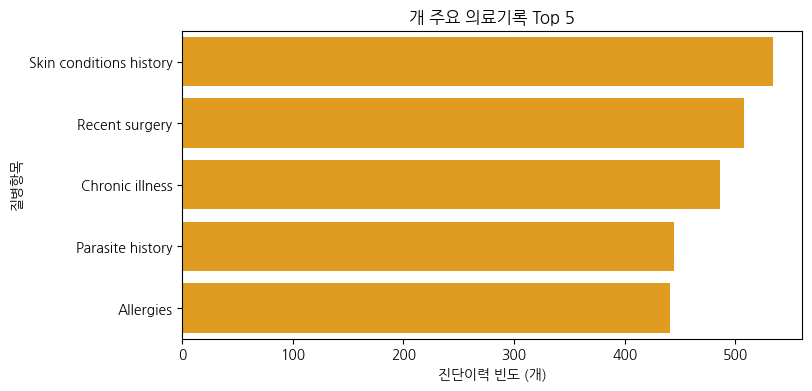

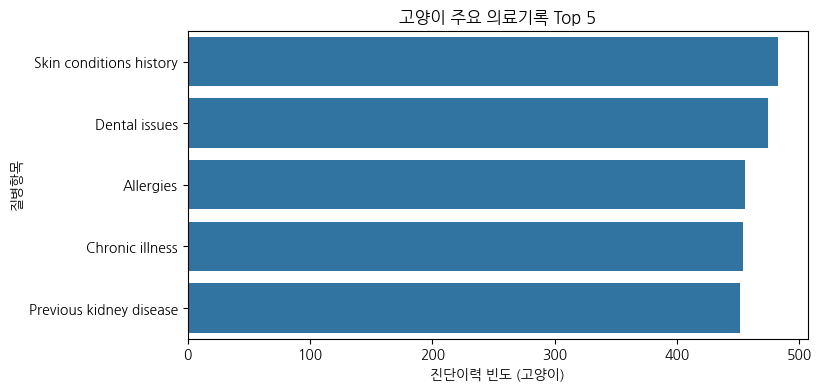

In [ ]:
# ======================================================
# Dog / Cat별 질병항목 빈도 계산
# ======================================================
dog_terms = list(chain.from_iterable(df9[df9['AnimalType']=='Dog']['MedicalList']))
cat_terms = list(chain.from_iterable(df9[df9['AnimalType']=='Cat']['MedicalList']))

dog_freq = Counter(dog_terms)
cat_freq = Counter(cat_terms)

df_dog = pd.DataFrame(dog_freq.most_common(5), columns=['질병항목', 'Dog_빈도'])
df_cat = pd.DataFrame(cat_freq.most_common(5), columns=['질병항목', 'Cat_빈도'])

#컬럼명 지정
df_dog.rename(columns={'Dog_빈도': '진단이력빈도(개)'}, inplace=True)
df_cat.rename(columns={'Cat_빈도': '진단이력빈도(고양이)'}, inplace=True)

print("\n=== 🐶 개 주요 의료항목 Top 5 ===")
print(df_dog)
print("\n=== 🐱 고양이 주요 의료항목 Top 5 ===")
print(df_cat)

# ======================================================
# 시각화 (Top 5)
# ======================================================
plt.figure(figsize=(8,4))
sns.barplot(y='질병항목', x='진단이력빈도(개)', data=df_dog, color='orange')
plt.title('개 주요 의료기록 Top 5')
plt.xlabel('진단이력 빈도 (개)')
plt.ylabel('질병항목')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(y='질병항목', x='진단이력빈도(고양이)', data=df_cat, color='tab:blue')
plt.title('고양이 주요 의료기록 Top 5')
plt.xlabel('진단이력 빈도 (고양이)')
plt.ylabel('질병항목')
plt.show()


In [ ]:
#카이제곱 검정
import pandas as pd
from scipy.stats import chi2_contingency

#1. 복사 및 전처리
df9 = df_vet.copy()
df9['AnimalName'] = df9['AnimalName'].str.lower().str.strip()

#2. MedicalHistory에서 첫 번째 질병 추출
df9['PrimaryDisease'] = df9['MedicalHistory'].apply(lambda x: str(x).split(',')[0].strip())

#3. 불필요한 항목 제거
exclude_terms = ['no previous conditions', 'not vaccinated', 'vaccinated']
df9 = df9[~df9['PrimaryDisease'].str.lower().isin(exclude_terms)]

#4. 교차표 생성
ct = pd.crosstab(df9['AnimalName'], df9['PrimaryDisease'])
print("=== 교차표 미리보기 ===")
print(ct.head(), "\n")

#5. 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(ct)
print(f"카이제곱 통계량={chi2:.3f}, 자유도={dof}, p-value={p:.4f}")

if p < 0.05:
    print("개와 고양이의 질병 유형 분포는 통계적으로 유의한 차이가 있습니다.")
else:
    print("개와 고양이의 질병 유형 분포에 유의한 차이가 없습니다.")


=== 교차표 미리보기 ===
PrimaryDisease  Allergies  Chronic illness  Dental issues  Parasite history  \
AnimalName                                                                    
cat                   456              454            475               443   
dog                   441              486            414               445   

PrimaryDisease  Previous heart condition  Previous kidney disease  \
AnimalName                                                          
cat                                  419                      452   
dog                                  378                      418   

PrimaryDisease  Recent surgery  Skin conditions history  
AnimalName                                               
cat                        445                      483  
dog                        508                      534   

카이제곱 통계량=15.689, 자유도=7, p-value=0.0281
개와 고양이의 질병 유형 분포는 통계적으로 유의한 차이가 있습니다.


In [ ]:
# 비율 비교
prop = (ct.T / ct.T.sum()).T * 100
diff = (prop.loc['cat'] - prop.loc['dog']).sort_values(ascending=False)

print("🐱 고양이에서 상대적으로 높은 질병 Top 5:")
print(diff.head(5))
print("\n🐶 개에서 상대적으로 높은 질병 Top 5:")
print(diff.tail(5))

🐱 고양이에서 상대적으로 높은 질병 Top 5:
PrimaryDisease
Dental issues               1.672382
Previous heart condition    1.121783
Previous kidney disease     0.927874
Allergies                   0.403500
Parasite history           -0.065299
dtype: float64

🐶 개에서 상대적으로 높은 질병 Top 5:
PrimaryDisease
Allergies                  0.403500
Parasite history          -0.065299
Chronic illness           -0.893364
Skin conditions history   -1.418309
Recent surgery            -1.748567
dtype: float64


In [ ]:
# 관찰도수 비율 차이 확인
prop = (ct.T / ct.T.sum()).T * 100
diff = prop.loc['cat'] - prop.loc['dog']
diff.sort_values(ascending=False)

,0
PrimaryDisease,
Dental issues,1.291141
Previous heart condition,0.883774
Vaccinated,0.826573
Previous kidney disease,0.749612
Allergies,0.371766
Parasite history,0.031040
Chronic illness,-0.564809
No previous conditions,-0.620410
Not vaccinated,-0.846254


In [ ]:
print(df_vet.columns.tolist())


['AnimalName', 'Breed', 'Age', 'Weight_kg', 'MedicalHistory', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']


In [ ]:
print(df_vet['AnimalName'].value_counts(dropna=False))

AnimalName
Dog    5020
cat    4980
Name: count, dtype: int64


# 미드티어 사료 찾기

In [ ]:
# 데이터 복사
mid_df = df_food.copy()

# mid 티어 필터링
mid_df = mid_df[mid_df['pet_food_tier'] == 'mid']

# 브랜드별 빈도 계산
mid_counts = mid_df['dry_food_brand_pre_tails'].value_counts()

# 30개 이상인 브랜드만 남기기
mid_counts = mid_counts[mid_counts >= 30]

# 결과 출력
pd.set_option('display.max_rows', None)
print(mid_counts)

dry_food_brand_pre_tails
Bakers                             3598
Harringtons                        1632
Pedigree                           1510
Wagg                                661
Beta                                567
Skinner's Field & Trial             525
Asda Hero                           423
Tesco Premium                       300
Iams                                286
Autarky                             174
Lifestage from Jollyes              167
Beneful                             161
Wagg Working Dog                    153
Perfect Fit                         147
Dr John                             144
Pets at Home Complete               139
Chudleys                             98
Wellness                             84
Alpha                                53
Country Kibble                       45
Chudleys Working Dog                 43
HiLife                               40
Pero Premium                         37
CSJ                                  36
Healthy Option 

In [ ]:
#데이터 복사
mid_df = df_food.copy()

#mid티어 필터링
mid_df = mid_df[mid_df['pet_food_tier'] == 'mid']
mid_counts = mid_df['dry_food_brand_pre_tails'].value_counts()

#mid티어 출력
pd.set_option('display.max_rows', None)
print(mid_counts)

dry_food_brand_pre_tails
Bakers                               3598
Harringtons                          1632
Pedigree                             1510
Wagg                                  661
Beta                                  567
Skinner's Field & Trial               525
Asda Hero                             423
Tesco Premium                         300
Iams                                  286
Autarky                               174
Lifestage from Jollyes                167
Beneful                               161
Wagg Working Dog                      153
Perfect Fit                           147
Dr John                               144
Pets at Home Complete                 139
Chudleys                               98
Wellness                               84
Alpha                                  53
Country Kibble                         45
Chudleys Working Dog                   43
HiLife                                 40
Pero Premium                           37
CSJ      

## 미드티어 사료 다른 티어랑 안겹치게 하기

In [ ]:
df_food['pet_food_tier'].unique()

array(['superpremium', 'premium', 'mid'], dtype=object)

In [ ]:
# 티어별 브랜드 세트 추출
tier_brands = {
    tier: set(df_food[df_food['pet_food_tier'] == tier]['dry_food_brand_pre_tails'].dropna())
    for tier in df_food['pet_food_tier'].unique()
}

# mid 티어이면서 다른 티어(premium, superpremium)와 겹치는 브랜드 제외
mid_unique = tier_brands['mid'] - (tier_brands['premium'] | tier_brands['superpremium'])

print(mid_unique)

{'Beta', 'DWD Working Dog Foods', 'Perfect Fit', 'Pero Premium', 'Canine Cook', 'Autarky', 'Trophy', 'Lifestage from Jollyes', 'Lathams', 'Country Kibble', 'Ultima', "Skinner's Field & Trial", 'Healthy Option', 'Friskies', 'Chudleys Working Dog', 'Heritage', 'Chudleys'}


In [ ]:
#티어별 브랜드 세트 추출
tier_brands = {
    tier: set(df_food[df_food['pet_food_tier'] == tier]['dry_food_brand_pre_tails'].dropna())
    for tier in df_food['pet_food_tier'].unique()
}

#mid 티어 브랜드 중 다른 티어(premium, superpremium)와 겹치는 브랜드 제외
mid_unique = tier_brands['mid'] - (tier_brands['premium'] | tier_brands['superpremium'])

#mid 티어 데이터만 필터링
mid_df = df_food[df_food['pet_food_tier'] == 'mid']

#중복 제외된 브랜드 중 실제 데이터에서의 등장 빈도 계산
mid_counts = (
    mid_df[mid_df['dry_food_brand_pre_tails'].isin(mid_unique)]
    ['dry_food_brand_pre_tails']
    .value_counts()
)

#결과 출력 (내림차순 정렬된 형태)
pd.set_option('display.max_rows', None)
print(mid_counts)


dry_food_brand_pre_tails
Beta                       567
Skinner's Field & Trial    525
Autarky                    174
Lifestage from Jollyes     167
Perfect Fit                147
Chudleys                    98
Country Kibble              45
Chudleys Working Dog        43
Pero Premium                37
Healthy Option              34
Heritage                    23
Lathams                     23
Trophy                      22
Canine Cook                 11
Ultima                       9
DWD Working Dog Foods        5
Friskies                     4
Name: count, dtype: int64


In [ ]:
df_food.columns

Index(['customer_id', 'pet_id', 'pet_order_number', 'wet_food_order_number',
       'orders_since_first_wet_trays_order', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_signup_datetime', 'pet_allergen_list',
       'pet_fav_flavour_list', 'pet_health_issue_list', 'neutered', 'gender',
       'pet_breed_size', 'signup_promo', 'ate_wet_food_pre_tails',
       'dry_food_brand_pre_tails', 'pet_life_stage_at_order',
       'order_payment_date', 'kibble_kcal', 'wet_kcal', 'total_order_kcal',
       'wet_trays', 'wet_food_discount_percent', 'wet_tray_size',
       'premium_treat_packs', 'dental_treat_packs',
       'wet_food_textures_in_order', 'total_web_sessions',
       'total_web_sessions_since_last_order', 'total_minutes_on_website',
       'total_minutes_on_website_since_last_order', 'total_wet_food_updates',
       'total_wet_food_updates_since_last_order',
       'last_customer_support_ticket_date',
       'customer_support_ticket_category'],
      dtype='object')